In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import interpolate
from scipy.integrate import simps, romb, trapz
plt.rcParams.update({'font.size': 13})

def findexp_replace(folder,filename):
    logtmp=os.path.isfile("tmp")
    if logtmp==True:
        print(filename+" converted")
        return
    print("converting "+filename)
    os.system("cp "+folder+filename+" tmp")
    os.system("sed -i 's/ /  /g' tmp")
    os.system("sed -i 's/+/E+/g' tmp")
    os.system("sed -i 's/-/E-/g' tmp")
    os.system("sed -i 's/(/,/g' tmp")
    os.system("sed -i 's/)/,/g' tmp")
    for i in range(99):
        if i<10: os.system("sed -i 's/+0"+str(i)+"E/+0"+str(i)+" /g' tmp")
        if i<10: os.system("sed -i 's/-0"+str(i)+"E/-0"+str(i)+" /g' tmp")
        if i>=10: os.system("sed -i 's/+"+str(i)+"E/+"+str(i)+" /g' tmp")
        if i>=10: os.system("sed -i 's/-"+str(i)+"E/-"+str(i)+" /g' tmp")
    return
            
def interp_omg(n,x,y,xnew,kind):
    if kind=="cubic": spline=interpolate.interp1d(x, y, kind=kind)
    if kind=="akima": spline=interpolate.Akima1DInterpolator(x,y)
    ynew=spline(xnew)
    return ynew

def nconfig(name):
    ncfg=0
    if (name=='2p6.3s2') or (name=='3S2'): ncfg=1
    if (name=='3s.3p') or (name=='3S1 3P1'): ncfg=2
    if (name=='3s.3d') or (name=='3S1 3D1'): ncfg=3
    if (name=='3s.4s') or (name=='3S1 4S1'): ncfg=4
    if (name=='3s.4p') or (name=='3S1 4P1'): ncfg=5
    if (name=='3s.4d') or (name=='3S1 4D1'): ncfg=6
    if (name=='3s.4f') or (name=='3S1 4F1'): ncfg=7
    if (name=='3s.5s') or (name=='3S1 5S1'): ncfg=8
    if (name=='3s.5p') or (name=='3S1 5P1'): ncfg=9
    if (name=='3s.5d') or (name=='3S1 5D1'): ncfg=10
    if (name=='3s.5f') or (name=='3S1 5F1'): ncfg=11
    if (name=='3s.5g') or (name=='3S1 5G1'): ncfg=12
    if (name=='3p2') or (name=='3P2'): ncfg=13
    if (name=='3s.6s') or (name=='3S1 6S1'): ncfg=14
    if (name=='3s.6p') or (name=='3S1 6P1'): ncfg=15
    if (name=='3s.6d') or (name=='3S1 6D1'): ncfg=16
    if (name=='3s.6f') or (name=='3S1 6F1'): ncfg=17
    if (name=='3s.6g') or (name=='3S1 6G1'): ncfg=18
    if (name=='3s.6h') or (name=='3S1 6H1'): ncfg=19
    if (name=='3s.7s') or (name=='3S1 7S1'): ncfg=20
    if (name=='3s.7p') or (name=='3S1 7P1'): ncfg=21
    if (name=='3s.7d') or (name=='3S1 7D1'): ncfg=22
    if (name=='3s.7f') or (name=='3S1 7F1'): ncfg=23
    if (name=='3s.7g') or (name=='3S1 7G1'): ncfg=24
    if (name=='3s.7h') or (name=='3S1 7H1'): ncfg=25
    if (name=='3s.7i') or (name=='3S1 7I1'): ncfg=26
    if (name=='3s.8s') or (name=='3S1 8S1'): ncfg=27
    if (name=='3s.8p') or (name=='3S1 8P1'): ncfg=28
    if (name=='3s.9s') or (name=='3S1 9S1'): ncfg=29    
    return ncfg

def map_BTspace(xener,eik,yomg,ntype):
    C=np.e
    xx=xener/eik
    if ntype==1:
        x=1-np.log(C)/np.log(xx+C)
        y=yomg/np.log(xx+np.e)
    if ntype==2:
        x=xx/(xx+C)
        y=yomg
    if ntype==3:
        x=xx/(xx+C)
        y=(xx+1)**2*yomg
    if ntype==4:
        x=1-np.log(C)/np.log(xx+C)
        y=yomg/np.log(xx+C)
    # include first point in BT-space
    lx=list(x)
    lx.insert(0,0)
    x=np.array(lx)
    ly=list(y)
    ly.insert(0,0)
    y=np.array(ly)
    # include last point in BT-space
    lx=list(x)
    xlast=0.99
#     if ntype==1: xlast=0.99
#     if ntype==3: xlast=0.99
    if lx[-1]>xlast: xlast=abs(lx[-1]-1.)/2.+lx[-1]
    lx.append(xlast)
    x=np.array(lx)
    if ntype==1 or ntype==4: ylast=abs(omg.loc[j][-2])
    if ntype==2 or ntype==3: ylast=y[-2]+(xlast-x[-2])/(x[-1]-x[-2])*(y[-1]-y[-2])
    ly=list(y)
    ly.append(ylast)
    y=np.array(ly)
    return x,y

def mapback_BTspace(ntype,eik,x_new,y_new):
    C=np.e
    if ntype==1:
        arg=np.log(C)/(1.-x_new)
        enerp=(np.exp(arg)-C)*eik
        omgp=y_new*np.log(enerp/eik+np.e)
    if ntype==2:
        enerp=x_new/(1.-x_new)*C*eik
        omgp=y_new
    if ntype==3:
        enerp=x_new*C/(1.-x_new)*eik
        omgp=y_new/(enerp/eik+1)**2
    if ntype==4:
        arg=np.log(C)/(1.-x_new)
        enerp=(np.exp(arg)-C)*eik
        omgp=y_new*np.log(enerp/eik+C)
    omgp[omgp < 0.] = 0.
#     nmax=npts-1
    nmax=len([i for i in enerp if i < 10.])
    enerpp=enerp[:nmax]
    omgpp=omgp[:nmax]
    return enerpp,omgpp

def data_trans(j,omg,levels):
    k=int(omg.loc[j]['k'])
    i=int(omg.loc[j]['i'])
    Aki=omg.loc[j]['aki']
    jk=levels.loc[k]['J']
    ji=levels.loc[i]['J']
    gk=2*jk+1
    gi=2*ji+1
    ek=levels.loc[k]['E']
    ei=levels.loc[i]['E']
    eik=abs(ek-ei)
    fik=0
    if eik!=0: 
        S=3.73491E-10*gk*Aki/eik**3
        fik=eik*S/(3.*gi)
    return Aki,gk,gi,eik,fik

def compute_ECS(enerpp,omgpp,ups_new):
    global ntemp,T,kB,convRyd2eV
    yups=[]
    for i in range(ntemp):
        kBT=kB*T[i]
        arg=enerpp*convRyd2eV/kBT
        yint=omgpp*np.exp(-arg)
        I1=simps(yint, arg)
        yups.append(I1)
        ups_new.loc[j,str(T[i])]=I1
    return yups

def plot_om2ups(xener,yomg,enerpp,omgpp,x,y,x_new,y_new,T,ups):
    fig=plt.figure(figsize=(15,5))
    ax1=plt.subplot(131)
    plt.plot(xener,yomg,'o-')
    plt.plot(enerpp,omgpp,'r-')
    ax2=plt.subplot(132)
    plt.plot(x,y,'o-')
    plt.plot(x_new,y_new,'r-')
    ax3=plt.subplot(133)
#     plt.plot(T,ups_prev.loc[0][3:-1],'k',label="adas")
    plt.plot(T,yups,'g-',label="__none__")
#     plt.legend(loc='upper left',bbox_to_anchor=[1,1],fontsize=15,ncol=1)
    plt.show()
    return

# Define final scattered electron energy and temperatures

In [117]:
global ntemp,T,kB,convRyd2eV,npts,ntran

kB=8.6173324E-05 # eV/K
convRyd2eV=13.6057 # eV/Ryd
convcm2Ryd=1./109737.26 

# INPUT:
ener=[1.00E-02,2.20E-01,4.89E-01,8.17E-01,1.22E+00,
      1.71E+00,2.30E+00,3.03E+00,3.92E+00,5.00E+00]
T=[3.0E+03,4.0E+03,5.0E+03,6.0E+03,7.0E+03,8.0E+03,9.0E+03,
   1.0E+04,1.1E+04,1.2E+04,1.3E+04,1.4E+04,1.5E+04,1.6E+04]

nener=len(ener)
ntemp=len(T)
ntran=3175
nlevels=90
npts=2**13+1
folder="./"
file_om="adf04_om"
file_ups="adf04_ups"

# Load level data and transitions collision strength:

In [118]:
# preproc adf04 file 
findexp_replace(folder,file_om)
# input level data
levels=pd.read_csv("tmp",header=None,skiprows=[0],nrows=nlevels,usecols=[0,1,2,3,4])
colsname=['CFG','S','L','J','E']
levels.columns=colsname
for j in range(nlevels):
    s=levels.loc[j]['CFG']
    sn=" ".join(s.split()[1:])
    levels.at[j,'CFG']=sn
levels.index=levels.index+1
print(levels.loc[2]['E'])
levels['E']=levels['E']*convcm2Ryd
print(levels.loc[2]['E'])
# input collision strength data
omgcols=[i for i in range(nener+4)]
omg=pd.read_csv("tmp",sep="\s+",header=None,skiprows=93,nrows=ntran,usecols=omgcols)
colsname= ['k','i','aki']
for i in range(nener):
    colsname.append(str(ener[i]))
colsname.append("inf")
omg.columns=colsname

adf04_om converted
18990.1614
0.17305117149817667


In [4]:
levels.head()

,CFG,S,L,J,E
1,3S2,1,0,0.0,0.000000
2,3S1 3P1,3,1,4.0,0.173051
3,3S1 3P1,1,1,1.0,0.336431
4,3S1 4S1,3,0,1.0,0.346630
5,3S1 4S1,1,0,0.0,0.383369


In [6]:
omg

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf
0,2,1,1.000000e-30,1.52,6.45,4.670,2.450,1.1600,0.5780,0.3140,0.1870,0.11500,0.07240,0.0
1,3,1,4.280000e+08,3.14,8.18,14.900,22.000,28.8000,34.6000,40.4000,45.6000,50.60000,55.50000,-19.6
2,3,2,1.000000e-30,11.90,11.80,4.350,1.770,0.7680,0.3700,0.1970,0.1140,0.06830,0.04190,0.0
3,4,1,1.000000e-30,1.06,1.18,0.385,0.199,0.0892,0.0409,0.0216,0.0128,0.00795,0.00501,0.0
4,4,2,9.750000e+07,11.80,27.10,29.600,43.700,41.5000,59.5000,55.2000,63.5000,72.00000,80.40000,-26.8


# Insert database info

In [7]:
mod_levels=pd.read_csv("ModelAtomicIonLevel.txt",sep="\s+",header='infer',nrows=55,usecols=[3,6,7,8,9,11,12])
mod_levels.rename(columns={'2S':'S'},inplace=True)
mod_levels['S']=mod_levels['S']+1
mod_levels['ExcitationWaven']=mod_levels['ExcitationWaven']*convcm2Ryd
mod_levels.index=mod_levels.index+1
nmodlev=len(mod_levels.index)

In [8]:
mod_levels.head()

,LevelNumber,ElectronConfig,Term,S,L,LevelWeight,ExcitationWaven
1,1,2p6.3s2,1S,1,0,1,0.000000
2,2,3s.3p,3P*,3,1,9,0.199116
3,3,3s.3p,1P*,1,1,3,0.319411
4,4,3s.4s,3S,3,0,3,0.375419
5,5,3s.4s,1S,1,0,1,0.396432


# Define new level tags based on database

In [119]:
k=0
idx_as=[]
idx_db=[]

for i in range(nlevels):
    ii=i+1
    name1=levels.loc[ii]['CFG']
    ncfg1=nconfig(name1)
    s1=levels.loc[ii]['S']
    l1=levels.loc[ii]['L']
    g1=2*levels.loc[ii]['J']+1
    for j in range(nmodlev):
        jj=j+1
        name2=mod_levels.loc[jj]['ElectronConfig']
        ncfg2=nconfig(name2)
        s2=mod_levels.loc[jj]['S']
        l2=mod_levels.loc[jj]['L']
        g2=mod_levels.loc[jj]['LevelWeight']
        #if (ncfg1==ncfg2) & (ncfg1!=0) & (s1==s2) & (l1==l2) & (g1==g2): 
        if (ncfg1==ncfg2) & (s1==s2) & (l1==l2) & (g1==g2): 
            k=k+1
            idx_as.append(ii)
            idx_db.append(jj)
#             print("k=",k)
#             print(ii,name1,ncfg1,s1,l1,g1)
#             print(j+1,name2,ncfg2,s2,l2,g2)
            break
nlevdic=len(idx_as)
# define dictionary with indexes:
#     first element: AS index
#     second element: DataBase index
levdic={idx_as[i]: idx_db[i] for i in range(nlevdic)}

In [120]:
levdic

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 16,
 16: 15,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 24,
 24: 26,
 25: 27,
 26: 23,
 27: 25,
 28: 29,
 29: 30,
 30: 31,
 31: 32,
 32: 33,
 33: 35,
 34: 37,
 35: 39,
 36: 40,
 37: 38,
 38: 34,
 39: 36,
 40: 41,
 41: 43,
 42: 42,
 43: 44,
 44: 45,
 45: 46,
 46: 50,
 47: 51,
 48: 53,
 49: 54,
 50: 52,
 51: 49,
 52: 47,
 53: 48,
 54: 55,
 65: 28}

# Replace computed energy levels with values from database

In [121]:
for idx_as, idx_db in levdic.items():
    ener_as=levels.loc[idx_as]['E']
    ener_db=mod_levels.loc[idx_db]['ExcitationWaven']
    levels.at[idx_as,'E']=ener_db

In [122]:
levels.head()

,CFG,S,L,J,E
1,3S2,1,0,0.0,0.000000
2,3S1 3P1,3,1,4.0,0.199116
3,3S1 3P1,1,1,1.0,0.319411
4,3S1 4S1,3,0,1.0,0.375419
5,3S1 4S1,1,0,0.0,0.396432


In [123]:
test=levels.copy()
for i in range(1,nlevels+1):
    idum=0
    for idx_as, idx_db in levdic.items():
        idum=idum+1
        if i==idx_as:
            break
        if i!=idx_as and idum==nlevdic: 
            test.drop(i,inplace=True)
            continue

for idx_as, idx_db in levdic.items():
    ener_as=test.loc[idx_as]['E']
    ener_db=mod_levels.loc[idx_db]['ExcitationWaven']
    test.at[idx_as,'E']=ener_db
    
newindex=[]
for idx_as, idx_db in levdic.items():
    newindex.append(idx_db)
test.index=newindex
test.sort_index(inplace=True)

# Sort type of transition

In [124]:
fbig=0.01
fzero=1.0E-04
ntype=[]
for j in range(ntran):
    k=int(omg.loc[j]['k'])
    i=int(omg.loc[j]['i'])
    Aki=omg.loc[j]['aki']
    jk=levels.loc[k]['J']
    ji=levels.loc[i]['J']
    gk=2*jk+1
    gi=2*ji+1
    ek=levels.loc[k]['E']
    ei=levels.loc[i]['E']
    eik=abs(ek-ei)
    if eik==0: 
        print(j,i,k,ei,ek)
        ntype.append(0)
        continue
    S=3.73491E-10*gk*Aki/eik**3
    fij=eik*S/(3.*gi)
    if levels.loc[k]['S']==levels.loc[i]['S']:
        if (abs(levels.loc[k]['L']-levels.loc[i]['L'])<=1) & (fij>=fbig):
            ntype.append(1)
        else:
            if (fij>fzero) & (fij<fbig):
                ntype.append(4)
            else:
                ntype.append(2)
    else:
        if (fij>fzero) & (fij<fbig):
            ntype.append(4)
        else:
            ntype.append(3)
        #ntype.append(3)
omg['type']=ntype

299 24 25 0.521816928908194 0.521816928908194
628 35 36 0.5341753748908985 0.5341753748908985
662 34 37 0.5341011339266171 0.5341011339266171
1172 48 49 0.5415709942092595 0.5415709942092595
1219 47 50 0.5415558307178436 0.5415558307178436
1266 46 51 0.5415073877368545 0.5415073877368545
1314 45 52 0.5412998556734513 0.5412998556734513
2793 75 76 0.5179565427458277 0.5179565427458277
2867 75 77 0.5179565427458277 0.5179565427458277
2868 76 77 0.5179565427458277 0.5179565427458277
2942 75 78 0.5179565427458277 0.5179565427458277
2943 76 78 0.5179565427458277 0.5179565427458277


In [125]:
omg.head()

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf,type
0,2,1,1.000000e-30,1.52,6.45,4.670,2.450,1.1600,0.5780,0.3140,0.1870,0.11500,0.07240,0.0,3
1,3,1,4.280000e+08,3.14,8.18,14.900,22.000,28.8000,34.6000,40.4000,45.6000,50.60000,55.50000,-19.6,1
2,3,2,1.000000e-30,11.90,11.80,4.350,1.770,0.7680,0.3700,0.1970,0.1140,0.06830,0.04190,0.0,3
3,4,1,1.000000e-30,1.06,1.18,0.385,0.199,0.0892,0.0409,0.0216,0.0128,0.00795,0.00501,0.0,3
4,4,2,9.750000e+07,11.80,27.10,29.600,43.700,41.5000,59.5000,55.2000,63.5000,72.00000,80.40000,-26.8,1


# Burgess and Tully interpolation + effective collision strength calculation:

In [126]:
ups=omg.copy()
enercols=[str(ener[i]) for i in range(nener)]
tmpcols=[str(T[i]) for i in range(ntemp)]
enercols.append("type")
ups.drop(enercols, axis=1, inplace=True)
tmp=[0 for i in range(ntran)]
for i in range(ntemp):
    ii=i+3
    ups.insert(ii,tmpcols[i], tmp)

In [127]:
ups.head()

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
0,2,1,1.000000e-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,3,1,4.280000e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-19.6
2,3,2,1.000000e-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,1,1.000000e-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,4,2,9.750000e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-26.8


# Change type of some transition for better mapping

In [128]:
ntype2=[34,77,132]
for i in ntype2:
    omg.at[i,'type']=2

In [129]:
ntype4=[5,9,19,20,25,26,35,44,45,54,64,76,88,89,90,
        101,102,117,118,119,133,134,151,152,170,
        208,209,228,229,230,249,250,271,272,249,
        296,297,298,299,320,321,322,323,344,345,
        345,346,347,376,404,462,463,492,493,494,
        523,524,525,555,556,588,589,592,624,625,
        626,627,628,659,660,661,662,663,694,695,
        696,697,698,699,730,731,732,733,734,766,
        773,774,775,776,816,846,845,846,847,848,
        849,850,851,856,893,894,895,896,898,899,
        935,936,937,938,940,942,983,984,
        1015,1016,1022,1021,1022,1023,1024,1025,1027,1028,
        1067,1068,1069,1070,1072,1073,1075,1076,1113,1114,
        1115,1116,1118,1119,1120,1121,1122,1123,1155,1159,
        1164,1167,1168,1169,1170,1171,1172,1203,1204,1205,
        1206,1207,1212,1215,1216,1217,1218,1219,1220,1251,
        1252,1253,1254,1255,1260,1263,1264,1265,1266,1267,
        1268,1269,1300,1301,1302,1303,1304,1309,1312,1313,
        1314,1315,1316,1317,1318,1319,1363,1364,1365,1366,
        1367,1408,1412,1413,1420,1421,1422,1423,1424,1469,
        1470,1471,1472,1477,1478,1518,1521,1522,1523,1524,
        1525,1526,1532,1582,1583,1584,1585,1586,1588,1589,
        1626,1631,1638,1639,1640,1641,1642,1644,1645,1688,
        1695,1696,1697,1698,1699,1701,1702,1746,1753,1754,
        1755,1756,1757,1759,1760,1804,1805,1812,1813,1814,
        1815,1816,1818,1819,1822,1854,1855,1856,1857,1858,
        1863,1866,1868,1869,1870,1871,1877,1880,1881,1882,
        1883,1884,1824,1927,1928,1929,1930,1931,1932,1938,
        1941,1942,1943,1944,1945,1976,1977,1978,1979,1980,
        1988,1989,1990,1991,1992,1993,1999,2002,2003,2004,
        2005,2006,2007,2022,2021,2022,2023,2024,2025,2026,
        2027,2028,2029,2030,2073,2074,2075,2076,2077,2078,
        2084,2087,2088,2089,2090,2091,2095,2144,2145,2146,
        2147,2148,2150,2151,2157,2158,2159,2160,2207,2208,
        2214,2217,2218,2219,2220,2221,2225,2227,2284,2285,
        2286,2287,2288,2292,2294,2295,2357,2358,2359,2360,
        2362,2363,2412,2413,2414,2415,2419,2425,2426,2427,
        2429,2431,2432,2482,2483,2484,2485,2486,2488,2495,
        2496,2497,2498,2500,2501,2552,2553,2254,2255,2256,
        2558,2559,2565,2566,2567,2568,2570,2571,2572,2573,
        2610,2613,2615,2616,2623,2624,2625,2627,2629,2630,
        2636,2637,2638,2639,2641,2642,2643,2644,2645,2682,
        2683,2684,2685,2687,2688,2695,2696,2697,2698,2699,
        2701,2702,2708,2709,2710,2711,2713,2714,2715,2716,
        2717,2718,2768,2769,2770,2771,2772,2774,2775,2781,
        2782,2783,2784,2786,2787,2788,2789,2790,2791,2792,
        2836,2837,2838,2839,2840,2841,2847,2850,2851,2852,
        2853,2854,2859,2862,2863,2864,2865,2866,2911,2912,
        2913,2914,2915,2916,2922,2925,2926,2927,2928,2929,
        2934,2937,2938,2939,2940,2941,2986,2987,2988,2990,
        2991,3000,3001,3002,3003,3004,3009,3012,3013,3014,
        3015,3016,3017,3018,3019,3062,3063,3064,3065,3066,
        3067,3073,3076,3077,3078,3079,3080,3085,3088,3089,
        3090,3091,3092,3093,3094,3095,3096,3139,3140,3141,
        3142,3143,3144,3150,3151,3152,3153,3155,3156,3157,
        3162,3165,3166,3167,3168,3169,3170,3171,3172,3173,
        3174]
for i in ntype4:
    omg.at[i,'type']=4

j= 0 type= 3


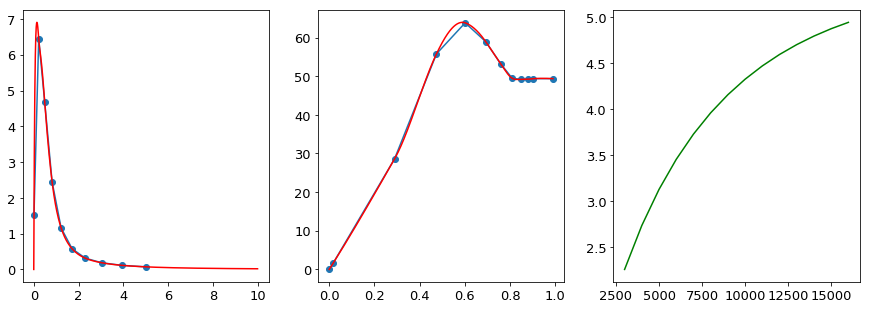

j= 1 type= 1


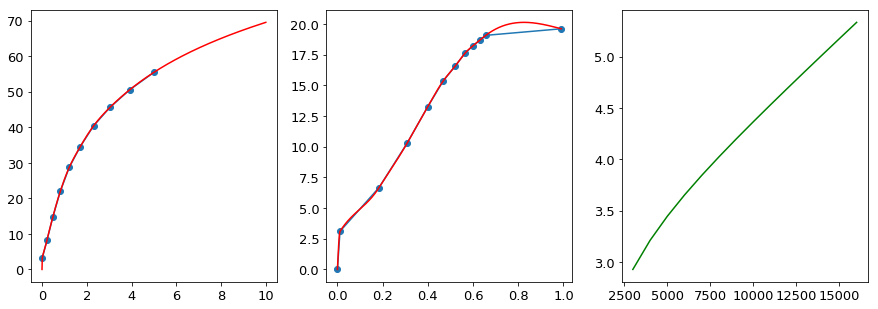

j= 2 type= 3


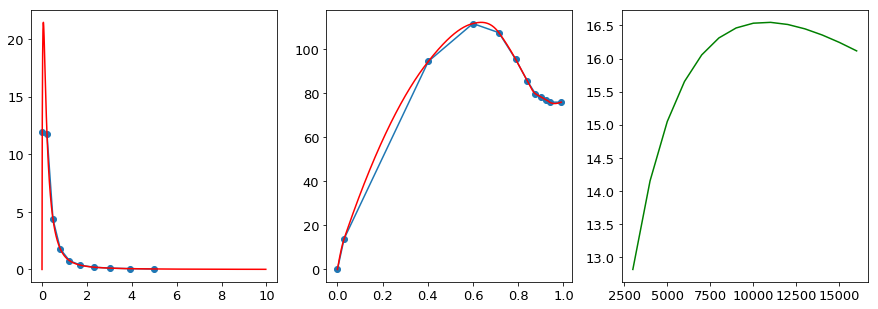

j= 3 type= 3


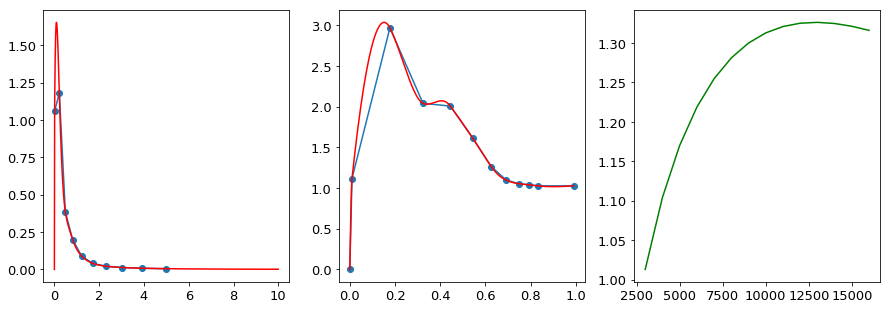

j= 4 type= 1


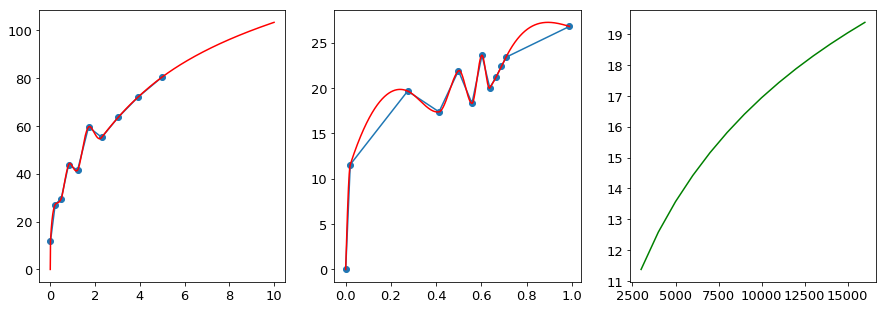

j= 5 type= 4
j= 6 type= 2
j= 7 type= 3
j= 8 type= 1
j= 9 type= 4
j= 10 type= 2
j= 11 type= 3
j= 12 type= 1
j= 13 type= 3
j= 14 type= 2
j= 15 type= 3
j= 16 type= 2
j= 17 type= 3
j= 18 type= 1
j= 19 type= 4
j= 20 type= 4
j= 21 type= 3
j= 22 type= 1
j= 23 type= 3
j= 24 type= 2
j= 25 type= 4
j= 26 type= 4
j= 27 type= 1
j= 28 type= 1
j= 29 type= 3
j= 30 type= 2
j= 31 type= 3
j= 32 type= 1
j= 33 type= 1
j= 34 type= 2
j= 35 type= 4
j= 36 type= 3
j= 37 type= 1
j= 38 type= 3
j= 39 type= 2
j= 40 type= 3
j= 41 type= 3
j= 42 type= 1
j= 43 type= 2
j= 44 type= 4
j= 45 type= 4
j= 46 type= 3
j= 47 type= 4
j= 48 type= 3
j= 49 type= 2
j= 50 type= 2
j= 51 type= 3
j= 52 type= 3
j= 53 type= 1
j= 54 type= 4
j= 55 type= 2
j= 56 type= 3
j= 57 type= 1
j= 58 type= 3
j= 59 type= 2
j= 60 type= 2
j= 61 type= 3
j= 62 type= 3
j= 63 type= 1
j= 64 type= 4
j= 65 type= 2
j= 66 type= 3
j= 67 type= 1
j= 68 type= 3
j= 69 type= 2
j= 70 type= 3
j= 71 type= 3
j= 72 type= 1
j= 73 type= 2
j= 74 type= 3
j= 75 type= 2
j= 76 type=

j= 572 type= 2
j= 573 type= 2
j= 574 type= 2
j= 575 type= 3
j= 576 type= 3
j= 577 type= 2
j= 578 type= 3
j= 579 type= 3
j= 580 type= 2
j= 581 type= 2
j= 582 type= 2
j= 583 type= 1
j= 584 type= 3
j= 585 type= 3
j= 586 type= 3
j= 587 type= 2
j= 588 type= 4
j= 589 type= 4
j= 590 type= 2
j= 591 type= 2
j= 592 type= 4
j= 593 type= 1
j= 594 type= 2
j= 595 type= 3
j= 596 type= 2
j= 597 type= 3
j= 598 type= 2
j= 599 type= 2
j= 600 type= 3
j= 601 type= 3
j= 602 type= 2
j= 603 type= 3
j= 604 type= 2
j= 605 type= 2
j= 606 type= 3
j= 607 type= 3
j= 608 type= 3
j= 609 type= 2
j= 610 type= 2
j= 611 type= 3
j= 612 type= 2
j= 613 type= 2
j= 614 type= 3
j= 615 type= 3
j= 616 type= 3
j= 617 type= 3
j= 618 type= 1
j= 619 type= 2
j= 620 type= 2
j= 621 type= 3
j= 622 type= 2
j= 623 type= 2
j= 624 type= 4
j= 625 type= 4
j= 626 type= 4
j= 627 type= 4
j= 628 type= 4
>>>>>>>>>>>>>>> eik==0
j= 629 type= 2
j= 630 type= 3
j= 631 type= 2
j= 632 type= 3
j= 633 type= 2
j= 634 type= 2
j= 635 type= 3
j= 636 type= 3
j=

j= 1110 type= 2
j= 1111 type= 2
j= 1112 type= 1
j= 1113 type= 4
j= 1114 type= 4
j= 1115 type= 4
j= 1116 type= 4
j= 1117 type= 2
j= 1118 type= 4
j= 1119 type= 4
j= 1120 type= 4
j= 1121 type= 4
j= 1122 type= 4
j= 1123 type= 4
j= 1124 type= 4
j= 1125 type= 2
j= 1126 type= 3
j= 1127 type= 2
j= 1128 type= 3
j= 1129 type= 2
j= 1130 type= 2
j= 1131 type= 3
j= 1132 type= 3
j= 1133 type= 2
j= 1134 type= 3
j= 1135 type= 2
j= 1136 type= 2
j= 1137 type= 3
j= 1138 type= 3
j= 1139 type= 3
j= 1140 type= 2
j= 1141 type= 2
j= 1142 type= 3
j= 1143 type= 2
j= 1144 type= 2
j= 1145 type= 3
j= 1146 type= 3
j= 1147 type= 3
j= 1148 type= 3
j= 1149 type= 2
j= 1150 type= 2
j= 1151 type= 2
j= 1152 type= 3
j= 1153 type= 2
j= 1154 type= 2
j= 1155 type= 4
j= 1156 type= 3
j= 1157 type= 3
j= 1158 type= 3
j= 1159 type= 4
j= 1160 type= 1
j= 1161 type= 2
j= 1162 type= 2
j= 1163 type= 2
j= 1164 type= 4
j= 1165 type= 2
j= 1166 type= 2
j= 1167 type= 4
j= 1168 type= 4
j= 1169 type= 4
j= 1170 type= 4
j= 1171 type= 4
j= 1172 

j= 1624 type= 2
j= 1625 type= 3
j= 1626 type= 4
j= 1627 type= 3
j= 1628 type= 3
j= 1629 type= 1
j= 1630 type= 3
j= 1631 type= 4
j= 1632 type= 4
j= 1633 type= 2
j= 1634 type= 2
j= 1635 type= 2
j= 1636 type= 2
j= 1637 type= 2
j= 1638 type= 4
j= 1639 type= 4
j= 1640 type= 4
j= 1641 type= 4
j= 1642 type= 4
j= 1643 type= 1
j= 1644 type= 4
j= 1645 type= 4
j= 1646 type= 1
j= 1647 type= 3
j= 1648 type= 2
j= 1649 type= 3
j= 1650 type= 2
j= 1651 type= 3
j= 1652 type= 3
j= 1653 type= 2
j= 1654 type= 1
j= 1655 type= 3
j= 1656 type= 2
j= 1657 type= 3
j= 1658 type= 3
j= 1659 type= 1
j= 1660 type= 2
j= 1661 type= 2
j= 1662 type= 3
j= 1663 type= 3
j= 1664 type= 2
j= 1665 type= 3
j= 1666 type= 3
j= 1667 type= 1
j= 1668 type= 2
j= 1669 type= 2
j= 1670 type= 4
j= 1671 type= 3
j= 1672 type= 3
j= 1673 type= 3
j= 1674 type= 2
j= 1675 type= 3
j= 1676 type= 3
j= 1677 type= 1
j= 1678 type= 2
j= 1679 type= 2
j= 1680 type= 4
j= 1681 type= 2
j= 1682 type= 3
j= 1683 type= 3
j= 1684 type= 3
j= 1685 type= 3
j= 1686 

j= 2148 type= 4
j= 2149 type= 2
j= 2150 type= 4
j= 2151 type= 4
j= 2152 type= 2
j= 2153 type= 1
j= 2154 type= 2
j= 2155 type= 2
j= 2156 type= 2
j= 2157 type= 4
j= 2158 type= 4
j= 2159 type= 4
j= 2160 type= 4
j= 2161 type= 2
j= 2162 type= 3
j= 2163 type= 4
j= 2164 type= 3
j= 2165 type= 2
j= 2166 type= 2
j= 2167 type= 3
j= 2168 type= 3
j= 2169 type= 4
j= 2170 type= 3
j= 2171 type= 2
j= 2172 type= 2
j= 2173 type= 3
j= 2174 type= 3
j= 2175 type= 3
j= 2176 type= 2
j= 2177 type= 1
j= 2178 type= 3
j= 2179 type= 2
j= 2180 type= 2
j= 2181 type= 3
j= 2182 type= 3
j= 2183 type= 3
j= 2184 type= 3
j= 2185 type= 2
j= 2186 type= 2
j= 2187 type= 1
j= 2188 type= 3
j= 2189 type= 2
j= 2190 type= 2
j= 2191 type= 3
j= 2192 type= 3
j= 2193 type= 3
j= 2194 type= 3
j= 2195 type= 3
j= 2196 type= 2
j= 2197 type= 2
j= 2198 type= 2
j= 2199 type= 1
j= 2200 type= 3
j= 2201 type= 2
j= 2202 type= 2
j= 2203 type= 3
j= 2204 type= 3
j= 2205 type= 3
j= 2206 type= 3
j= 2207 type= 4
j= 2208 type= 4
j= 2209 type= 2
j= 2210 

j= 2673 type= 3
j= 2674 type= 2
j= 2675 type= 3
j= 2676 type= 3
j= 2677 type= 2
j= 2678 type= 2
j= 2679 type= 2
j= 2680 type= 2
j= 2681 type= 1
j= 2682 type= 4
j= 2683 type= 4
j= 2684 type= 4
j= 2685 type= 4
j= 2686 type= 2
j= 2687 type= 4
j= 2688 type= 4
j= 2689 type= 2
j= 2690 type= 2
j= 2691 type= 2
j= 2692 type= 2
j= 2693 type= 1
j= 2694 type= 2
j= 2695 type= 4
j= 2696 type= 4
j= 2697 type= 4
j= 2698 type= 4
j= 2699 type= 4
j= 2700 type= 2
j= 2701 type= 4
j= 2702 type= 4
j= 2703 type= 2
j= 2704 type= 2
j= 2705 type= 2
j= 2706 type= 2
j= 2707 type= 1
j= 2708 type= 4
j= 2709 type= 4
j= 2710 type= 4
j= 2711 type= 4
j= 2712 type= 2
j= 2713 type= 4
j= 2714 type= 4
j= 2715 type= 4
j= 2716 type= 4
j= 2717 type= 4
j= 2718 type= 4
j= 2719 type= 1
j= 2720 type= 3
j= 2721 type= 2
j= 2722 type= 3
j= 2723 type= 2
j= 2724 type= 3
j= 2725 type= 3
j= 2726 type= 2
j= 2727 type= 2
j= 2728 type= 3
j= 2729 type= 2
j= 2730 type= 3
j= 2731 type= 3
j= 2732 type= 2
j= 2733 type= 2
j= 2734 type= 2
j= 2735 

In [130]:
for j in range(ntran):
    ntype=int(omg.loc[j]['type'])
    print("j=",j,"type=",ntype)
    Aki,gk,gi,eik,fik=data_trans(j,omg,levels)
    if eik==0: 
        print(">>>>>>>>>>>>>>> eik==0")
        continue
    # copy data into aux variables
    yomg=omg.loc[j][3:-2].values
    yomg[yomg < 0.] = 0.
    xener=np.array(ener) # final scattered energy
    # map into BT-space
    x,y=map_BTspace(xener,eik,yomg,ntype)
    # make spline of x y in BT-space
    nx=len(x)
    x_new=np.linspace(x[0],x[nx-1], npts)
    y_new=interp_omg(nx,x,y,x_new,'akima')
    # mapping back from BT-space
    enerpp,omgpp=mapback_BTspace(ntype,eik,x_new,y_new)
    # compute effective collision strength
    yups=compute_ECS(enerpp,omgpp,ups)
    # plot and check data
    iplot=1
    if (iplot==1) & (j<5):
        plot_om2ups(xener,yomg,enerpp,omgpp,x,y,x_new,y_new,T,ups)

In [131]:
ups.head()

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
0,2,1,1.000000e-30,2.260425,2.737113,3.129384,3.455625,3.729337,3.960675,4.157408,4.325566,4.469884,4.594122,4.701300,4.793868,4.873835,4.942862,0.0
1,3,1,4.280000e+08,2.926531,3.209754,3.444473,3.652054,3.843181,4.023820,4.197533,4.366537,4.532258,4.695626,4.857260,5.017576,5.176850,5.335269,-19.6
2,3,2,1.000000e-30,12.812863,14.151047,15.048333,15.653072,16.054873,16.311574,16.462242,16.534162,16.546892,16.514752,16.448406,16.355912,16.243430,16.115724,0.0
3,4,1,1.000000e-30,1.013002,1.104166,1.169983,1.218578,1.254560,1.280917,1.299748,1.312607,1.320680,1.324893,1.325982,1.324533,1.321023,1.315838,0.0
4,4,2,9.750000e+07,11.373278,12.582264,13.571771,14.417057,15.156876,15.814480,16.405462,16.941156,17.430285,17.879833,18.295532,18.682163,19.043749,19.383693,-26.8


# Input R-Matrix calculation from Barklem

In [26]:
folder='/home/ale/zatsarinny/archive_BSR712/'
omg1_RM=pd.read_csv(folder+'omega001-002.dat',header=None,sep='\s+')
omg2_RM=pd.read_csv(folder+'omega001-003.dat',header=None,sep='\s+')
folder='/home/ale/zatsarinny/barklem_data/'
ups1_RM=pd.read_csv(folder+'ecs_1-2/BSRM_ups001-002.dat',header=None,sep='\s+')
ups2_RM=pd.read_csv(folder+'ecs_1-3/BSRM_ups001-003.dat',header=None,sep='\s+')

# Interpolate and compute effective collision strength with R-matrix data

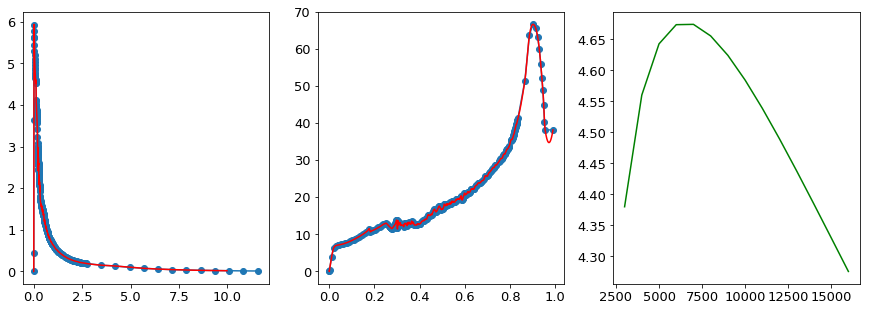

In [113]:
# copy data into aux variables
eik=0.199116
xener=omg1_RM[0]-eik
yomg=omg1_RM[1]
ntype=3
# map into BT-space
x,y=map_BTspace(xener,eik,yomg,ntype)
# make spline of x y in BT-space
nx=len(x)
x_new=np.linspace(x[0],x[nx-1], npts)
y_new=interp_omg(nx,x,y,x_new,'akima')
# mapping back from BT-space
enerpp,omgpp=mapback_BTspace(ntype,eik,x_new,y_new)
# compute effective collision strength
yups=compute_ECS(enerpp,omgpp,ups)
plot_om2ups(xener,yomg,enerpp,omgpp,x,y,x_new,y_new,T,ups)
myups1=yups

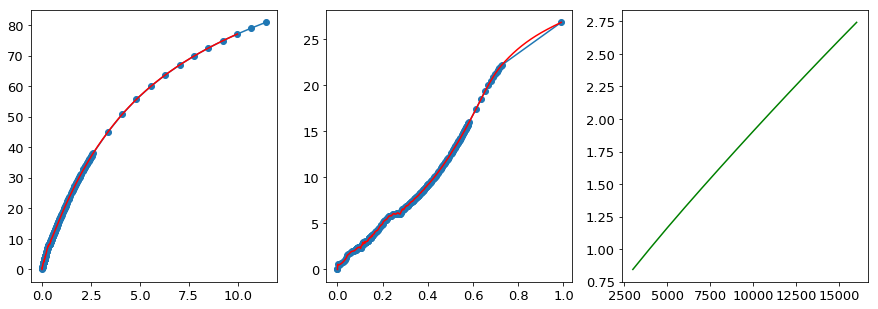

In [114]:
# copy data into aux variables
eik=0.31940554
xener=omg2_RM[0]-eik
yomg=omg2_RM[1]
ntype=1
# map into BT-space
x,y=map_BTspace(xener,eik,yomg,ntype)
# make spline of x y in BT-space
nx=len(x)
x_new=np.linspace(x[0],x[nx-1], npts)
y_new=interp_omg(nx,x,y,x_new,'akima')
# mapping back from BT-space
enerpp,omgpp=mapback_BTspace(ntype,eik,x_new,y_new)
# compute effective collision strength
yups=compute_ECS(enerpp,omgpp,ups)
plot_om2ups(xener,yomg,enerpp,omgpp,x,y,x_new,y_new,T,ups)
myups2=yups

# Compare my calculations with $\Omega$ and $\Upsilon$ by R-Matrix (Barklem)

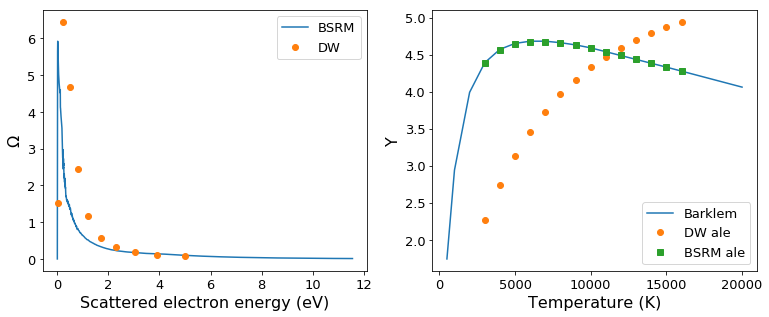

In [115]:
eik=0.199116
fig=plt.figure(figsize=(6.4*2, 4.8))
ax1=plt.subplot(121)
plt.plot(omg1_RM[0]-eik,omg1_RM[1],label='BSRM')
plt.plot(ener,omg.loc[0][3:-2],'o',label='DW')
plt.legend(loc='best')
plt.xlabel('Scattered electron energy (eV)',fontsize=16)
plt.ylabel(r'$\Omega$',fontsize=16)
ax2=plt.subplot(122)
plt.plot(ups1_RM[0],ups1_RM[1],label='Barklem')
plt.plot(T,ups.loc[0][3:-1],'o',label='DW ale')
plt.plot(T,myups1,'s',label='BSRM ale')
plt.legend(loc='best')
plt.xlabel('Temperature (K)',fontsize=16)
plt.ylabel(r'$\Upsilon$',fontsize=16)
plt.show()

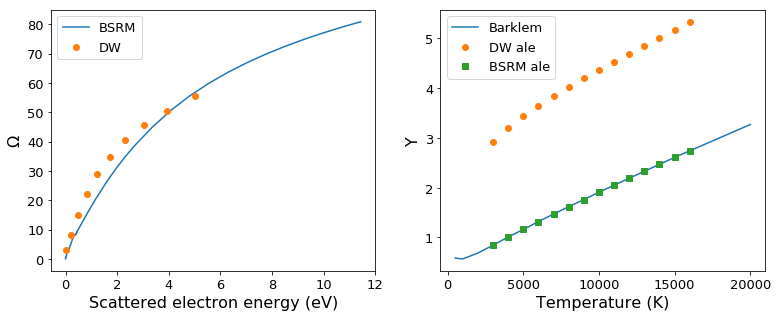

In [116]:
eik=0.31940554
fig=plt.figure(figsize=(6.4*2, 4.8))
ax1=plt.subplot(121)
plt.plot(omg2_RM[0]-eik,omg2_RM[1],label='BSRM')
plt.plot(ener,omg.loc[1][3:-2],'o',label='DW')
plt.legend(loc='best')
plt.xlabel('Scattered electron energy (eV)',fontsize=16)
plt.ylabel(r'$\Omega$',fontsize=16)
ax2=plt.subplot(122)
plt.plot(ups2_RM[0],ups2_RM[1],label='Barklem')
plt.plot(T,ups.loc[1][3:-1],'o',label='DW ale')
plt.plot(T,myups2,'s',label='BSRM ale')
plt.legend(loc='best')
plt.xlabel('Temperature (K)',fontsize=16)
plt.ylabel(r'$\Upsilon$',fontsize=16)
plt.show()

In [133]:
ups.head()

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
0,2,1,1.000000e-30,2.260425,2.737113,3.129384,3.455625,3.729337,3.960675,4.157408,4.325566,4.469884,4.594122,4.701300,4.793868,4.873835,4.942862,0.0
1,3,1,4.280000e+08,2.926531,3.209754,3.444473,3.652054,3.843181,4.023820,4.197533,4.366537,4.532258,4.695626,4.857260,5.017576,5.176850,5.335269,-19.6
2,3,2,1.000000e-30,12.812863,14.151047,15.048333,15.653072,16.054873,16.311574,16.462242,16.534162,16.546892,16.514752,16.448406,16.355912,16.243430,16.115724,0.0
3,4,1,1.000000e-30,1.013002,1.104166,1.169983,1.218578,1.254560,1.280917,1.299748,1.312607,1.320680,1.324893,1.325982,1.324533,1.321023,1.315838,0.0
4,4,2,9.750000e+07,11.373278,12.582264,13.571771,14.417057,15.156876,15.814480,16.405462,16.941156,17.430285,17.879833,18.295532,18.682163,19.043749,19.383693,-26.8


In [146]:
ups.loc[(ups.loc[:]['k']==35)&(ups.loc[:]['i']==24)][:]

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
583,35,24,1700000.0,17029.887269,17528.847677,17762.479047,17902.956958,18021.047911,18146.540055,18291.26887,18458.867647,18649.200188,18860.469948,19090.248112,19335.975622,19595.201446,19865.686397,-14800.0


In [147]:
omg.loc[(omg.loc[:]['k']==35)&(omg.loc[:]['i']==24)][:]

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf,type
583,35,24,1700000.0,20200.0,25100.0,41300.0,52200.0,62300.0,70800.0,78900.0,86500.0,93800.0,101000.0,-14800.0,1


# 26-39:  $3s5g \,^3G \rightarrow 3s6h \,^3H$

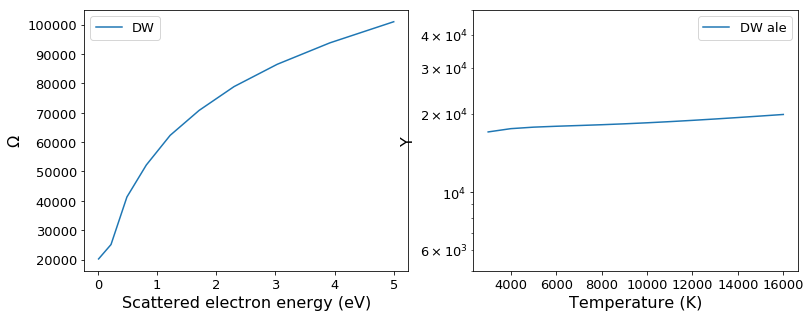

In [166]:
i=24
k=35
ei=levels.loc[i]['E']
ek=levels.loc[k]['E']
eki=ek-ei
fig=plt.figure(figsize=(6.4*2, 4.8))
ax1=plt.subplot(121)
# plt.plot(omg1_RM[0]-eik,omg1_RM[1],label='BSRM')
plt.plot(ener,omg.loc[583][3:-2],'-',label='DW')
plt.legend(loc='best')
plt.xlabel('Scattered electron energy (eV)',fontsize=16)
plt.ylabel(r'$\Omega$',fontsize=16)
ax2=plt.subplot(122)
# plt.plot(ups1_RM[0],ups1_RM[1],label='Barklem')
plt.plot(T,ups.loc[583][:][3:-1],'-',label='DW ale')
plt.legend(loc='best')
plt.yscale('log')
plt.ylim(5000,50000)
plt.xlabel('Temperature (K)',fontsize=16)
plt.ylabel(r'$\Upsilon$',fontsize=16)
plt.show()

# check transitions with large ECS values

In [23]:
for jik in lcheck:
    itr=jik[0]
    idx_db=jik[1]
    kdx_db=jik[2]
    for ias, idb in levdic.items():
        if idx_db==idb: idx_as=ias
        if kdx_db==idb: kdx_as=ias
            
    tmodlev = mod_levels.copy()
    rows1 = mod_levels.loc[0:idx_db-2]
    rows2 = mod_levels.loc[idx_db:kdx_db-2]
    rows3 = mod_levels.loc[kdx_db:] 
    tmodlev.drop(rows1.index, inplace=True)
    tmodlev.drop(rows2.index, inplace=True)
    tmodlev.drop(rows3.index, inplace=True)

    tlev = levels.copy()
    rows1 = levels.loc[0:idx_as-1]
    rows2 = levels.loc[idx_as+1:kdx_as-1]
    rows3 = levels.loc[kdx_as+1:] 
    tlev.drop(rows1.index, inplace=True)
    tlev.drop(rows2.index, inplace=True)
    tlev.drop(rows3.index, inplace=True)
    
    print("\n*",idx_db,"==>",kdx_db)
    print(tmodlev.to_string(index=False))
#     print("\nautostr:  ",idx_as,"==>",kdx_as)
#     print(tlev)
#     print('\ncollision strength:\n\nener       omg')
#     print(omg.loc[itr][3:-2])
#     print('\neffective collision strength:\n\nener       ups')
#     print(ups.loc[itr][3:-2])
#     print('\n',70*'*','\n')



* 13 ==> 14
LevelNumber ElectronConfig Term  S  L  LevelWeight  ExcitationWaven
         12          3s.4d   1D  1  2            5         0.484199
         13          3s.4d   3D  3  2           15         0.493836

* 21 ==> 22
LevelNumber ElectronConfig Term  S  L  LevelWeight  ExcitationWaven
         20          3s.5d   1D  1  2            5         0.513120
         21          3s.5d   3D  3  2           15         0.519133

* 21 ==> 24
LevelNumber ElectronConfig Term  S  L  LevelWeight  ExcitationWaven
         20          3s.5d   1D  1  2            5         0.513120
         23          3s.5f  1F*  1  3            7         0.521283

* 24 ==> 26
LevelNumber ElectronConfig Term  S  L  LevelWeight  ExcitationWaven
         23          3s.5f  1F*  1  3            7         0.521283
         25          3s.6p  1P*  1  1            3         0.521382

* 32 ==> 33
LevelNumber ElectronConfig Term  S  L  LevelWeight  ExcitationWaven
         31          3s.6d   1D  1  2            5 

In [24]:
jik=lcheck[0]
itr=jik[0]
idx_db=jik[1]
kdx_db=jik[2]
for ias, idb in levdic.items(): 
    if idx_db==idb: idx_as=ias
    if kdx_db==idb: kdx_as=ias
print("database: ",idx_db,"==>",kdx_db)
print(mod_levels.loc[idx_db-1:kdx_db-1])
print("\nautostr:  ",idx_as,"==>",kdx_as)
print(levels.loc[idx_as:kdx_as])
print('\ncollision strength:\n\nener       omg')
print(omg.loc[itr][3:-2])
print('\neffective collision strength:\n\nener       ups')
print(ups.loc[itr][3:-2])

database:  13 ==> 14
    LevelNumber ElectronConfig Term  S  L  LevelWeight  ExcitationWaven
12           12          3s.4d   1D  1  2            5         0.484199
13           13          3s.4d   3D  3  2           15         0.493836

autostr:   13 ==> 14
        CFG  S  L    J         E
13  3S1 4D1  3  2  7.0  0.493836
14  3S1 5P1  3  1  4.0  0.494352

collision strength:

ener       omg
0.01      8650.0
0.22     27100.0
0.489    31100.0
0.817    33400.0
1.22     35000.0
1.71     36400.0
2.3      37700.0
3.03     39000.0
3.92     40300.0
5.0      41600.0
Name: 90, dtype: float64

effective collision strength:

ener       ups
3000.0     10180.154073
4000.0     11624.427153
5000.0     12795.304505
6000.0     13778.459718
7000.0     14624.601069
8000.0     15366.319633
9000.0     16025.828536
10000.0    16618.954355
11000.0    17157.373606
12000.0    17649.947534
13000.0    18103.559596
14000.0    18523.662821
15000.0    18914.649948
Name: 90, dtype: float64


In [27]:
1/abs(mod_levels.loc[idx_db-1]['ExcitationWaven']-mod_levels.loc[kdx_db-1]['ExcitationWaven'])

103.75927323201167

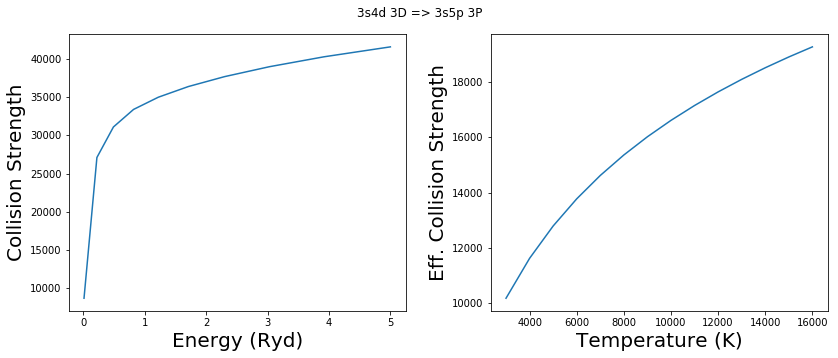

In [28]:
fig=plt.figure(figsize=(12,5))
ax1=plt.subplot(121)
plt.plot(ener,omg.loc[itr][3:-2])
ax2=plt.subplot(122)
plt.plot(T,ups.loc[itr][3:-1])
fig.suptitle('3s4d 3D => 3s5p 3P',y=1.01)
ax1.set_xlabel('Energy (Ryd)',fontsize=20)
ax1.set_ylabel('Collision Strength',fontsize=20)
ax2.set_xlabel('Temperature (K)',fontsize=20)
ax2.set_ylabel('Eff. Collision Strength',fontsize=20)
plt.tight_layout(pad=2.0)
plt.show()

# check transitions with ECS equal to zero

In [29]:
itr=299
k_as=int(omg.loc[itr:itr]['k'])
i_as=int(omg.loc[itr:itr]['i'])
print("transition",itr,"\n- autostructure:",i_as,"=>",k_as)
for idum_as,idum_db in levdic.items():
    if k_as==idum_as: k_db=idum_db
    if i_as==idum_as: i_db=idum_db
print("- data base:    ",i_db,"=>",k_db)

transition 299 
- autostructure: 24 => 25
- data base:     26 => 27


In [30]:
omg.loc[itr:itr]

,k,i,aki,0.01,0.22,0.489,0.817,1.22,1.71,2.3,3.03,3.92,5.0,inf,type
299,25,24,1.000000e-30,244.0,36.2,16.1,8.49,4.05,1.94,1.05,0.62,0.383,0.241,0.0,4


In [31]:
ups.loc[itr:itr]

,k,i,aki,3000.0,4000.0,5000.0,6000.0,7000.0,8000.0,9000.0,10000.0,11000.0,12000.0,13000.0,14000.0,15000.0,16000.0,inf
299,25,24,1.000000e-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
nrows=len(levels)
for i in range(1,nrows+1):
    iener=levels.loc[i]['E']
    for j in range(i+1,nrows+1):
        jener=levels.loc[j]['E']
        if iener==jener: print(i,j,iener)

24 25 0.521816928908194
34 37 0.5341011339266171
35 36 0.5341753748908985
45 52 0.5412998556734513
46 51 0.5415073877368545
47 50 0.5415558307178436
48 49 0.5415709942092595
75 76 0.5179565427458277
75 77 0.5179565427458277
75 78 0.5179565427458277
76 77 0.5179565427458277
76 78 0.5179565427458277
77 78 0.5179565427458277


In [41]:
levels.loc[24:25]

,CFG,S,L,J,E
24,3S1 5G1,3,4,13.0,0.521817
25,3S1 5G1,1,4,4.0,0.521817
